In [1]:
import pandas as pd
import numpy as np

In [3]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy_financial as npf

In [3]:
df = pd.read_csv('preprocess_all_v1.csv')

In [4]:
columns_list = df.columns.tolist()
print(columns_list)

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'grade', 'home_ownership', 'id', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'loan_status_label', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'tot_coll_a

In [5]:
df['id'].head()

0     84253847
1    119708428
2    109906493
3     60286250
4    151871973
Name: id, dtype: int64

In [6]:
has_duplicates = df['id'].duplicated().any()
print(f"중복 존재 여부: {has_duplicates}")

중복 존재 여부: False


In [7]:
df_raw = pd.read_csv('lending_club_2020_train.csv')

/var/folders/_p/v2fnmdsd6l97jkvv3652qkcm0000gn/T/ipykernel_872/3451801978.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('lending_club_2020_train.csv')


In [8]:
has_duplicates = df_raw['id'].duplicated().any()
print(f"중복 존재 여부: {has_duplicates}")

중복 존재 여부: False


In [9]:
df = df.merge(df_raw[['id', 'funded_amnt']], on='id', how='left')

In [10]:
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,...,total_pymnt,total_rev_hi_lim,verification_status,emp_length,fico,credit_hist_months,have_bc,have_rev,treasury,funded_amnt
0,0.0,8.0,OK,11.608245,8.702178,70.374384,0,0,1,34.70,...,8599.680000,10.317483,Verified,10+ years,672.0,278,1,1,1.071500,23200.0
1,0.0,5.0,TX,11.082158,10.919099,6.566836,0,0,0,17.74,...,11804.280000,11.157707,Not Verified,unknown,822.0,401,1,1,1.682857,16000.0
2,0.0,3.0,FL,10.819798,7.815207,73.376344,0,0,0,6.99,...,5134.174383,9.532569,Not Verified,5 years,702.0,226,1,1,1.483636,4500.0
3,0.0,6.0,IL,11.002117,6.891626,91.072727,0,0,0,28.94,...,23278.037543,10.229260,Source Verified,10+ years,677.0,190,1,1,1.013333,20000.0
4,0.0,5.0,NC,11.487854,9.901736,69.192901,0,0,0,10.31,...,444.230000,11.302229,Verified,5 years,737.0,206,1,1,2.187727,19000.0


In [11]:
df['funded_amnt'].isna().sum()

2573

In [12]:
df['funded_amnt'] = df['funded_amnt'].fillna(df['loan_amnt'])

In [13]:
df['funded_amnt'].isna().sum()

0

In [14]:
diff = df['loan_amnt'] - df['funded_amnt']
diff.describe()

count    1.075398e+06
mean     6.726603e+00
std      2.284825e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.042500e+04
dtype: float64

In [15]:
df['issue_d'].head()

0    2016-07-01
1    2017-10-01
2    2017-05-01
3    2015-09-01
4    2019-05-01
Name: issue_d, dtype: object

In [16]:
df['treasury'].head()

0    1.071500
1    1.682857
2    1.483636
3    1.013333
4    2.187727
Name: treasury, dtype: float64

In [17]:
df['term'].head()

0    0
1    1
2    1
3    1
4    0
Name: term, dtype: int64

In [18]:
# 기존 국채 연 이자율(%) => 월 이자율 단위로 변환(소수)
# 찾아보니 sharpe ratio 계산 시 수익률(이자율)은 %가 아닌 소수로 넣는 게 일반적이라고 합니다!
df['treasury'] = ((1 + df['treasury']/100) ** (1/12) - 1)

In [19]:
df['treasury']

0          0.000889
1          0.001392
2          0.001228
3          0.000841
4          0.001805
             ...   
1075393    0.000703
1075394    0.000678
1075395    0.000718
1075396    0.000329
1075397    0.001943
Name: treasury, Length: 1075398, dtype: float64

In [20]:
# total_payment로 접근해야할까? -> 정상 상환된 경우 'funded_amnt'보다 상환 총액이 작을 수 있나? 특별대출? 프로모션?
filtered = df[(df['loan_status'] == 0) & (df['term'] == 1)]
installment_minus_funded = filtered['installment']*36 - filtered['funded_amnt']
installment_minus_funded.describe()

count    684369.000000
mean       2334.114373
std        1885.149399
min      -27553.720000
25%        1071.200000
50%        1795.960000
75%        2955.160000
max       21913.880000
dtype: float64

In [21]:
# total_pymnt보다 funded_amnt가 더 많은 이상한 경우가 있다?
total_minus_funded = filtered['total_pymnt'] - filtered['funded_amnt']
total_minus_funded.describe()

count    684369.000000
mean       1714.908056
std        1597.196882
min       -6410.840000
25%         650.991046
50%        1263.954637
75%        2249.420000
max       19577.151653
dtype: float64

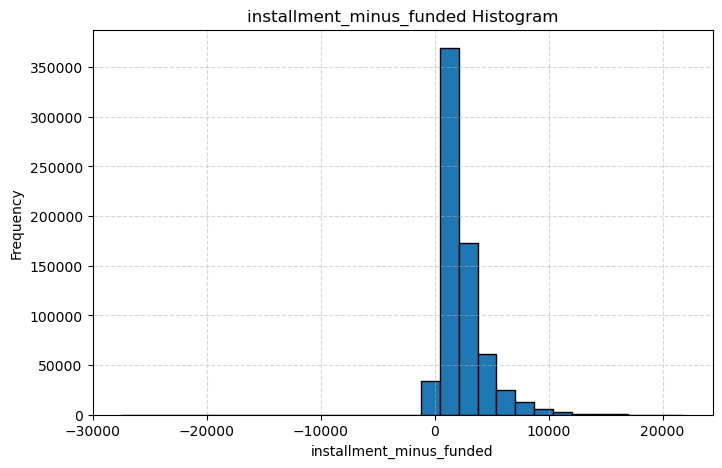

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
installment_minus_funded.hist(bins=30, edgecolor='black')
plt.title('installment_minus_funded Histogram')
plt.xlabel('installment_minus_funded')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [23]:
# 2. "현재가치로 다 더한 값이 total_pymnt" = 역산 방식
# C가 매월 들어오고(가정), 이걸 (1+무위험이자율)^기간으로 곱한 값을 더해나간 값의 합이 total_pymnt가 되도록 C를 역으로 찾는 것
# 즉, "만약 만기 시점에 total_pymnt를 n개월에 걸쳐 동일하게 받는다면, 매월 얼마씩 받아야 total_pymnt의 가치랑 맞을까?"
# "받을 돈이 언제 들어올지 모르니, 가장 단순하고 보수적으로 n개월 동안 같은 돈을 받는다고 치고, 실제 받은 금액과 맞추는 '가상 현금흐름'을 만든다."
# "미래 불확실성/불규칙성"을 일종의 평균화, 단순화해서 모델의 IRR 계산을 일관되게 하려는 목적
# 모두 total_pymnt 기준

import numpy as np
import numpy_financial as npf

def calc_row_irr_full(row):
    # 36개월 fully paid
    if (row['loan_status'] == 0) and (row['term'] == 1):
        n_months = 36
        funded_amnt = row['funded_amnt']
        installment = row['installment']
        cash_flow = [-funded_amnt] + [installment] * n_months
    # 60개월 fully paid
    elif (row['loan_status'] == 0) and (row['term'] == 0):
        n_months = 60
        funded_amnt = row['funded_amnt']
        installment = row['installment']
        cash_flow = [-funded_amnt] + [installment] * n_months
    # 36개월 default or charge off
    elif (row['loan_status'] == 1) and (row['term'] == 1):
        n_months = 36
        funded_amnt = row['funded_amnt']
        total_pymnt = row['total_pymnt']
        mnth_treasury_rate = row['treasury']
        discount_factors = [(1 + mnth_treasury_rate) ** t for t in range(1, n_months + 1)]
        # 매월 유입될 C 계산
        C = total_pymnt / sum(discount_factors)
        cash_flow = [-funded_amnt] + [C] * n_months
    # 60개월 default or charge off
    elif (row['loan_status'] == 1) and (row['term'] == 0):
        n_months = 60
        funded_amnt = row['funded_amnt']
        total_pymnt = row['total_pymnt']
        mnth_treasury_rate = row['treasury']
        discount_factors = [(1 + mnth_treasury_rate) ** t for t in range(1, n_months + 1)]
        # 매월 유입될 C 계산
        C = total_pymnt / sum(discount_factors)
        cash_flow = [-funded_amnt] + [C] * n_months
    else:
        return np.nan

    try:
        irr = npf.irr(cash_flow)
    except:
        irr = np.nan
    return irr

# 일괄 적용 (전체 DataFrame, 모든 경우 대응)
df['irr'] = df.apply(calc_row_irr_full, axis=1)

In [24]:
filtered = df[(df['loan_status'] == 0) & (df['term'] == 1)]
nan_count = filtered['irr'].isna().sum()
print(f"36개월 & fully paid에 NaN 개수: {nan_count}")

36개월 & fully paid에 NaN 개수: 0


In [25]:
filtered = df[(df['loan_status'] == 0) & (df['term'] == 0)]
nan_count = filtered['irr'].isna().sum()
print(f"60개월 & fully paid에 NaN 개수: {nan_count}")

60개월 & fully paid에 NaN 개수: 0


In [26]:
filtered = df[(df['loan_status'] == 1) & (df['term'] == 1)]
nan_count = filtered['irr'].isna().sum()
print(f"36개월 & default or charged에 NaN 개수: {nan_count}")

36개월 & default or charged에 NaN 개수: 608


In [27]:
filtered = df[(df['loan_status'] == 1) & (df['term'] == 0)]
nan_count = filtered['irr'].isna().sum()
print(f"60개월 & default or charged에 NaN 개수: {nan_count}")

60개월 & default or charged에 NaN 개수: 177


In [28]:
# irr의 결측치는 최소값으로 대체: 
# default or charge off에서 irr = NaN 경우는 total_pymnt가 너무 작아 수학적으로 irr이 구해지지 않는 경우
df['irr'] = df['irr'].fillna(df['irr'].min(skipna=True))

In [29]:
df['irr'].isna().sum()

0

In [30]:
filtered = df[(df['loan_status'] == 0) & (df['term'] == 1)]
filtered['irr'].describe()

count    684369.000000
mean          0.009732
std           0.003439
min          -0.116614
25%           0.006827
50%           0.009534
75%           0.011660
max           0.025828
Name: irr, dtype: float64

In [31]:
filtered = df[(df['loan_status'] == 0) & (df['term'] == 0)]
filtered['irr'].describe()

count    183531.000000
mean          0.013139
std           0.003900
min          -0.034692
25%           0.010517
50%           0.012542
75%           0.015450
max           0.025826
Name: irr, dtype: float64

In [32]:
filtered = df[(df['loan_status'] == 1) & (df['term'] == 1)]
filtered['irr'].describe()

count    125942.000000
mean         -0.033891
std           0.030223
min          -0.252353
25%          -0.049066
50%          -0.029870
75%          -0.012842
max           0.048632
Name: irr, dtype: float64

In [33]:
filtered = df[(df['loan_status'] == 1) & (df['term'] == 0)]
filtered['irr'].describe()

count    81556.000000
mean        -0.022708
std          0.019914
min         -0.252353
25%         -0.032922
50%         -0.021556
75%         -0.009857
max          0.019295
Name: irr, dtype: float64

In [35]:
df.to_csv('IRR_preprocess_all_v3.csv', index=False, encoding='utf-8')

In [32]:
# 1. 문자열을 datetime으로 변환 (format='mixed'로 다양한 날짜 형식 지원, pandas 2.0 이상)
dates = pd.to_datetime(df['issue_d'], format='mixed')

# 2. 중복 제거, 정렬 (Series에서만 가능)
unique_dates = dates.drop_duplicates().sort_values()
print(unique_dates)

533007   2007-06-01
321      2007-07-01
7219     2007-08-01
15311    2007-09-01
7387     2007-10-01
            ...    
13691    2020-05-01
34       2020-06-01
211      2020-07-01
4582     2020-08-01
4563     2020-09-01
Name: issue_d, Length: 160, dtype: datetime64[ns]


In [6]:
df['loan_status'].unique()

array([1, 0])

In [17]:
df['term'].unique()

array([0, 1])